# 4.0 Modelling

**4.0 Introduction**

**4.0.1 Library Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import os
import lxml
import datetime
import requests
import json
import collections
import seaborn as sns
from scipy import stats
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate

# may not need these but better to include
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression


**4.0.2 File Imports**

In [2]:
cd

C:\Users\rands


In [3]:
# StandardScaler | X & y scaled
X_train_SS = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_SS.xlsx', index_col=None)
y_train_SS = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_SS.xlsx', index_col=None)
X_test_SS = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_SS.xlsx', index_col=None)
y_test_SS = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_SS.xlsx', index_col=None)

# Standard Scaler | X only scaled
X_train_SS_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_SS_y_uns.xlsx', index_col=None)
y_train_SS_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_SS_y_uns.xlsx', index_col=None)
X_test_SS_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_SS_y_uns.xlsx', index_col=None)
y_test_SS_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_SS_y_uns.xlsx', index_col=None)

# Log Scaler | X & y scaled
X_train_LG = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_LG.xlsx', index_col=None)
y_train_LG = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_LG.xlsx', index_col=None)
X_test_LG = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_LG.xlsx', index_col=None)
y_test_LG = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_LG.xlsx', index_col=None)

# Log Scaler | X only scaled
X_train_LG_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_train_LG_y_uns.xlsx', index_col=None)
y_train_LG_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_train_LG_y_uns.xlsx', index_col=None)
X_test_LG_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_test_LG_y_uns.xlsx', index_col=None)
y_test_LG_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_test_LG.xlsx', index_col=None)

# StandardScaler & Log Combined | X only scaled
X_tr_SS_LG = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_tr_SS_LG.xlsx', index_col=None)
y_tr_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_tr_y_uns.xlsx', index_col=None)
X_te_SS_LG = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/X_te_SS_LG.xlsx', index_col=None)
y_te_y_uns = pd.read_excel('./_Capstone_One_Inflation/data/4.0 Pre Processing Data/y_te_y_uns.xlsx', index_col=None)

print('Finished; proceed.')

Finished; proceed.


**4.0.3 Confirming the files were imported / saved correctly**

In this section **we will double review the process is moving smoothly**; i.e. what was saved & imported is correct via the describe method; apologies in advance if this is long; **prudent to assume they are correct if I continue thereafter so please feel free to skip.**

`Mean` should be 0 `Std` should be 1

In [4]:
X_train_SS.describe()

,Unnamed: 0,Wages CPI_SS,WTI_SS,Copper_SS,Soybeans_SS,Natural Gas_SS,Heating Oil_SS,Corn_SS,Wheat_SS,Cattle_SS,Lean Hogs_SS,Sugar_SS,Lumber_SS,Capacity Utilization_SS,GDP_SS,M2 Velocity_SS,PMI_SS,USD Index_SS,Initial Jobless Claims_SS,Unemployment Rate_SS
count,218.000000,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02
mean,157.711009,-3.564936e-17,-5.092766e-18,3.514009e-17,-3.768647e-17,-2.444528e-17,1.655149e-18,2.902877e-17,-1.069481e-17,1.527830e-18,3.564936e-18,-8.657702e-18,-2.762826e-17,-4.558026e-17,6.773379e-17,2.323575e-17,-2.976085e-17,1.425975e-17,8.657702e-18,9.676256e-18
std,90.901141,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00
min,0.000000,-6.977019e+00,-3.783391e+00,-4.194080e+00,-3.280162e+00,-1.969069e+00,-3.380414e+00,-2.641519e+00,-2.034743e+00,-2.966145e+00,-2.453932e+00,-2.521716e+00,-2.522608e+00,-7.680682e+00,-8.837955e+00,-8.988479e+00,-3.333833e+00,-2.094012e+00,-3.190713e+00,-4.802520e+00
25%,81.500000,-2.671202e-01,-5.665365e-01,-5.924217e-01,-5.064631e-01,-6.724566e-01,-5.422759e-01,-6.269477e-01,-6.723267e-01,-6.458132e-01,-6.201385e-01,-6.977306e-01,-6.930695e-01,-2.313524e-01,-1.414367e-01,-9.686651e-02,-5.828489e-01,-7.944049e-01,-1.277904e-01,-2.348593e-01
50%,157.000000,1.153214e-01,-3.959852e-02,-9.739427e-02,-5.652283e-02,-1.579051e-01,-4.040096e-02,-5.827166e-02,-4.863862e-02,7.426409e-02,-4.506087e-02,-2.081390e-01,-3.689083e-02,1.477523e-01,1.250461e-01,8.804844e-02,-1.545851e-02,3.527433e-02,-8.785599e-02,-1.102867e-01
75%,235.750000,4.280369e-01,6.677299e-01,5.366898e-01,5.316750e-01,5.625160e-01,6.352366e-01,5.203411e-01,5.954279e-01,7.339765e-01,7.269682e-01,5.484182e-01,6.135977e-01,4.357818e-01,4.008007e-01,3.751039e-01,5.576631e-01,6.282367e-01,-4.770693e-02,5.581003e-02
max,311.000000,3.074376e+00,2.742497e+00,3.913407e+00,2.811401e+00,2.994870e+00,2.428936e+00,3.277006e+00,4.032564e+00,2.428476e+00,2.661448e+00,3.888003e+00,5.231216e+00,3.864717e+00,1.198672e+00,9.832153e-01,3.589476e+00,2.666820e+00,1.241375e+01,1.151649e+01


In [5]:
X_train_SS.head()

,Unnamed: 0,Wages CPI_SS,WTI_SS,Copper_SS,Soybeans_SS,Natural Gas_SS,Heating Oil_SS,Corn_SS,Wheat_SS,Cattle_SS,Lean Hogs_SS,Sugar_SS,Lumber_SS,Capacity Utilization_SS,GDP_SS,M2 Velocity_SS,PMI_SS,USD Index_SS,Initial Jobless Claims_SS,Unemployment Rate_SS
0,101,-0.272503,0.770139,-0.036749,-0.345722,-1.319337,-0.037380,-0.285358,-0.204055,0.312957,-0.252625,-0.668891,0.439447,0.444293,0.327651,0.088048,0.104897,0.915147,-0.214959,-0.567053
1,193,0.081334,-0.036542,0.451293,0.090576,1.639295,0.380561,-0.663352,-0.617169,1.900844,1.529011,1.137352,-0.317918,0.248713,-0.010664,-0.085279,0.104897,-1.046777,-0.107179,0.221907
2,72,-0.668041,-0.496463,-0.027826,-2.795000,-0.849965,-0.474246,-2.149208,-1.865332,1.183761,-0.549095,-0.621201,0.115848,0.171740,0.532148,0.348245,0.379995,0.729546,-0.163431,-0.193335
3,298,0.427689,0.697303,0.255910,0.133888,1.354380,0.616009,-0.538420,-1.155926,-1.041654,0.884238,0.927774,-0.556024,0.514892,0.385034,0.824372,0.299758,-1.225237,-0.096444,0.346479
4,15,0.073309,-0.130975,-0.288996,0.162870,0.314771,0.046900,-0.808623,0.012178,0.252933,-1.249591,-0.089238,0.442115,-0.198803,-0.053374,-0.276863,-0.869410,0.266966,-0.081844,-0.110287


In [6]:
X_train_SS = X_train_SS.drop(['Unnamed: 0'], axis=1)

In [7]:
y_train_SS.describe()

,Unnamed: 0,Inflation_SS
count,218.000000,2.180000e+02
mean,157.711009,-6.111319e-18
std,90.901141,1.002301e+00
min,0.000000,-4.436994e+00
25%,81.500000,-4.187935e-01
50%,157.000000,-1.285149e-02
75%,235.750000,4.430526e-01
max,311.000000,5.095772e+00


In [8]:
y_train_SS = y_train_SS.drop(['Unnamed: 0'], axis=1)

In [9]:
X_test_SS.describe()

,Unnamed: 0,Wages CPI_SS,WTI_SS,Copper_SS,Soybeans_SS,Natural Gas_SS,Heating Oil_SS,Corn_SS,Wheat_SS,Cattle_SS,Lean Hogs_SS,Sugar_SS,Lumber_SS,Capacity Utilization_SS,GDP_SS,M2 Velocity_SS,PMI_SS,USD Index_SS,Initial Jobless Claims_SS,Unemployment Rate_SS
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,150.372340,-0.039446,-0.046560,-0.151935,0.158702,-0.001416,-0.153214,0.271715,0.147639,-0.020189,0.150634,0.042247,0.105954,0.085988,0.114837,-0.011819,-0.177030,0.007469,-0.191525,-0.065229
std,88.858107,1.003180,1.116542,0.986746,1.140603,0.975567,0.963172,1.089934,1.083590,1.040120,1.097781,0.918600,1.470259,1.232635,1.525901,1.104324,1.048915,1.020621,2.410044,1.295092
min,3.000000,-6.008413,-3.755452,-4.281991,-3.578469,-2.087724,-3.479765,-2.917356,-2.913521,-3.321206,-2.026099,-1.857711,-2.360196,-7.342127,-8.837955,-8.988479,-4.147665,-2.129319,-12.599764,-5.342334
25%,76.250000,-0.383316,-0.529745,-0.692793,-0.534923,-0.585450,-0.578672,-0.322636,-0.559743,-0.760703,-0.704479,-0.517446,-0.778532,-0.172902,-0.221962,-0.236393,-0.866544,-0.610996,-0.129723,-0.276383
50%,147.500000,0.169963,0.082344,-0.298726,0.027747,-0.078682,-0.033070,0.158283,-0.041941,0.073698,0.035594,-0.128461,-0.174865,0.168818,0.068250,0.043185,-0.319213,-0.060458,-0.097518,-0.151811
75%,224.750000,0.452194,0.515139,0.412443,0.796244,0.688486,0.506057,0.848489,0.678288,0.811777,0.896525,0.528436,0.723928,0.421522,0.282676,0.402552,0.342742,0.589525,-0.054792,0.014286
max,309.000000,1.801829,3.879327,2.759676,2.987912,2.562655,1.748558,3.974551,4.040076,1.834564,2.674612,3.173226,6.689149,5.824493,6.258379,2.067133,3.130979,3.441559,17.266415,9.066558


In [10]:
X_test_SS = X_test_SS.drop(['Unnamed: 0'], axis=1)

In [11]:
y_test_SS.describe()

,Unnamed: 0,Inflation_SS
count,94.000000,94.000000
mean,150.372340,0.173736
std,88.858107,1.098587
min,3.000000,-5.962087
25%,76.250000,-0.369456
50%,147.500000,0.190744
75%,224.750000,0.720967
max,309.000000,3.599407


In [12]:
y_test_SS = y_test_SS.drop(['Unnamed: 0'], axis=1)

`Mean` should be 0 `Std` should be 1 for `X` but not `y`

In [13]:
X_train_SS_y_uns.describe()

,Unnamed: 0,Wages CPI_SS_yun,WTI_SS_yun,Copper_SS_yun,Soybeans_SS_yun,Natural Gas_SS_yun,Heating Oil_SS_yun,Corn_SS_yun,Wheat_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Sugar_SS_yun,Lumber_SS_yun,Capacity Utilization_SS_yun,GDP_SS_yun,M2 Velocity_SS_yun,PMI_SS_yun,USD Index_SS_yun,Initial Jobless Claims_SS_yun,Unemployment Rate_SS_yun
count,218.000000,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02
mean,157.711009,-3.564936e-17,-5.092766e-18,3.514009e-17,-3.768647e-17,-2.444528e-17,1.655149e-18,2.902877e-17,-1.069481e-17,1.527830e-18,3.564936e-18,-8.657702e-18,-2.762826e-17,-4.558026e-17,6.773379e-17,2.323575e-17,-2.976085e-17,1.425975e-17,8.657702e-18,9.676256e-18
std,90.901141,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00
min,0.000000,-6.977019e+00,-3.783391e+00,-4.194080e+00,-3.280162e+00,-1.969069e+00,-3.380414e+00,-2.641519e+00,-2.034743e+00,-2.966145e+00,-2.453932e+00,-2.521716e+00,-2.522608e+00,-7.680682e+00,-8.837955e+00,-8.988479e+00,-3.333833e+00,-2.094012e+00,-3.190713e+00,-4.802520e+00
25%,81.500000,-2.671202e-01,-5.665365e-01,-5.924217e-01,-5.064631e-01,-6.724566e-01,-5.422759e-01,-6.269477e-01,-6.723267e-01,-6.458132e-01,-6.201385e-01,-6.977306e-01,-6.930695e-01,-2.313524e-01,-1.414367e-01,-9.686651e-02,-5.828489e-01,-7.944049e-01,-1.277904e-01,-2.348593e-01
50%,157.000000,1.153214e-01,-3.959852e-02,-9.739427e-02,-5.652283e-02,-1.579051e-01,-4.040096e-02,-5.827166e-02,-4.863862e-02,7.426409e-02,-4.506087e-02,-2.081390e-01,-3.689083e-02,1.477523e-01,1.250461e-01,8.804844e-02,-1.545851e-02,3.527433e-02,-8.785599e-02,-1.102867e-01
75%,235.750000,4.280369e-01,6.677299e-01,5.366898e-01,5.316750e-01,5.625160e-01,6.352366e-01,5.203411e-01,5.954279e-01,7.339765e-01,7.269682e-01,5.484182e-01,6.135977e-01,4.357818e-01,4.008007e-01,3.751039e-01,5.576631e-01,6.282367e-01,-4.770693e-02,5.581003e-02
max,311.000000,3.074376e+00,2.742497e+00,3.913407e+00,2.811401e+00,2.994870e+00,2.428936e+00,3.277006e+00,4.032564e+00,2.428476e+00,2.661448e+00,3.888003e+00,5.231216e+00,3.864717e+00,1.198672e+00,9.832153e-01,3.589476e+00,2.666820e+00,1.241375e+01,1.151649e+01


In [14]:
X_train_SS_y_uns = X_train_SS_y_uns.drop(['Unnamed: 0'], axis=1)

In [15]:
y_train_SS_y_uns.describe()

,Unnamed: 0,Inflation
count,218.000000,218.000000
mean,157.711009,-0.072711
std,90.901141,0.802450
min,0.000000,-3.625000
25%,81.500000,-0.408000
50%,157.000000,-0.083000
75%,235.750000,0.282000
max,311.000000,4.007000


In [16]:
y_train_SS_y_uns = y_train_SS_y_uns.drop(['Unnamed: 0'], axis=1)

In [17]:
X_test_SS_y_uns.describe()

,Unnamed: 0,Wages CPI_SS_yun,WTI_SS_yun,Copper_SS_yun,Soybeans_SS_yun,Natural Gas_SS_yun,Heating Oil_SS_yun,Corn_SS_yun,Wheat_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Sugar_SS_yun,Lumber_SS_yun,Capacity Utilization_SS_yun,GDP_SS_yun,M2 Velocity_SS_yun,PMI_SS_yun,USD Index_SS_yun,Initial Jobless Claims_SS_yun,Unemployment Rate_SS_yun
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,150.372340,-0.039446,-0.046560,-0.151935,0.158702,-0.001416,-0.153214,0.271715,0.147639,-0.020189,0.150634,0.042247,0.105954,0.085988,0.114837,-0.011819,-0.177030,0.007469,-0.191525,-0.065229
std,88.858107,1.003180,1.116542,0.986746,1.140603,0.975567,0.963172,1.089934,1.083590,1.040120,1.097781,0.918600,1.470259,1.232635,1.525901,1.104324,1.048915,1.020621,2.410044,1.295092
min,3.000000,-6.008413,-3.755452,-4.281991,-3.578469,-2.087724,-3.479765,-2.917356,-2.913521,-3.321206,-2.026099,-1.857711,-2.360196,-7.342127,-8.837955,-8.988479,-4.147665,-2.129319,-12.599764,-5.342334
25%,76.250000,-0.383316,-0.529745,-0.692793,-0.534923,-0.585450,-0.578672,-0.322636,-0.559743,-0.760703,-0.704479,-0.517446,-0.778532,-0.172902,-0.221962,-0.236393,-0.866544,-0.610996,-0.129723,-0.276383
50%,147.500000,0.169963,0.082344,-0.298726,0.027747,-0.078682,-0.033070,0.158283,-0.041941,0.073698,0.035594,-0.128461,-0.174865,0.168818,0.068250,0.043185,-0.319213,-0.060458,-0.097518,-0.151811
75%,224.750000,0.452194,0.515139,0.412443,0.796244,0.688486,0.506057,0.848489,0.678288,0.811777,0.896525,0.528436,0.723928,0.421522,0.282676,0.402552,0.342742,0.589525,-0.054792,0.014286
max,309.000000,1.801829,3.879327,2.759676,2.987912,2.562655,1.748558,3.974551,4.040076,1.834564,2.674612,3.173226,6.689149,5.824493,6.258379,2.067133,3.130979,3.441559,17.266415,9.066558


In [18]:
X_test_SS_y_uns = X_test_SS_y_uns.drop(['Unnamed: 0'], axis=1)

In [19]:
y_test_SS_y_uns.describe()

,Unnamed: 0,Inflation_SS
count,94.000000,94.000000
mean,150.372340,0.173736
std,88.858107,1.098587
min,3.000000,-5.962087
25%,76.250000,-0.369456
50%,147.500000,0.190744
75%,224.750000,0.720967
max,309.000000,3.599407


In [20]:
y_test_SS_y_uns = y_test_SS_y_uns.drop(['Unnamed: 0'], axis=1)

`Mean` should be 0 `Std` should be 1

In [21]:
X_train_LG.describe()

,Unnamed: 0,Wages CPI_LG,WTI_LG,Copper_LG,Soybeans_LG,Natural Gas_LG,Heating Oil_LG,Corn_LG,Wheat_LG,Cattle_LG,Lean Hogs_LG,Sugar_LG,Lumber_LG,Capacity Utilization_LG,GDP_LG,M2 Velocity_LG,PMI_LG,USD Index_LG,Initial Jobless Claims_LG,Unemployment Rate_LG
count,218.000000,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,218.000000,2.180000e+02,2.180000e+02
mean,157.711009,-2.263735e-16,-2.648238e-17,3.768647e-17,1.833396e-17,3.463081e-17,2.673702e-18,8.810485e-17,-3.564936e-18,5.016375e-17,-2.266281e-17,-1.425975e-17,-4.066255e-18,-4.456170e-18,-2.416518e-16,2.406332e-17,-1.947983e-17,-0.012799,3.412153e-17,2.851949e-17
std,90.901141,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,0.012007,1.002301e+00,1.002301e+00
min,0.000000,-4.203779e+00,-3.308051e+00,-4.790893e+00,-3.256541e+00,-2.351455e+00,-2.941212e+00,-2.924180e+00,-2.556952e+00,-2.633208e+00,-2.438256e+00,-3.468529e+00,-3.038505e+00,-4.520455e+00,-3.102066e+00,-3.155028e+00,-3.893245e+00,-0.037961,-1.037009e+01,-9.181910e+00
25%,81.500000,-3.922100e-01,-6.014282e-01,-5.750684e-01,-5.083560e-01,-6.365610e-01,-5.845875e-01,-6.062502e-01,-6.420350e-01,-6.802635e-01,-6.221477e-01,-6.725542e-01,-6.727191e-01,-3.616021e-01,-5.612664e-01,-4.877854e-01,-5.535478e-01,-0.022312,-5.411911e-02,-2.153957e-01
50%,157.000000,2.665979e-02,-8.488108e-02,-6.524111e-02,-5.906084e-02,-6.468975e-02,-9.381907e-02,-1.671215e-02,6.137467e-02,2.357134e-02,-4.833773e-02,-1.004732e-01,3.617663e-02,6.764572e-02,-5.308771e-02,-1.275063e-01,5.063059e-02,-0.012357,5.152233e-02,-5.318401e-02
75%,235.750000,3.947888e-01,6.501558e-01,5.626163e-01,5.299037e-01,6.392270e-01,6.113677e-01,5.536605e-01,6.883328e-01,7.166612e-01,7.255195e-01,6.539755e-01,6.712153e-01,4.176488e-01,5.796108e-01,5.338289e-01,5.976906e-01,-0.005258,1.047383e-01,1.530685e-01
max,311.000000,4.675375e+00,3.071756e+00,3.530729e+00,2.828528e+00,2.453249e+00,2.727610e+00,2.942093e+00,2.934426e+00,2.718479e+00,2.680506e+00,2.825044e+00,3.940244e+00,6.673082e+00,3.243365e+00,2.464245e+00,3.163166e+00,0.019044,7.995727e+00,7.548036e+00


In [22]:
X_train_LG = X_train_LG.drop(['Unnamed: 0'], axis=1)

In [23]:
y_train_LG.describe()

,Unnamed: 0,Inflation_LG
count,218.000000,2.180000e+02
mean,157.711009,5.092766e-19
std,90.901141,1.002301e+00
min,0.000000,-4.657212e+00
25%,81.500000,-4.084960e-01
50%,157.000000,1.670749e-03
75%,235.750000,4.547053e-01
max,311.000000,4.837648e+00


In [24]:
y_train_LG = y_train_LG.drop(['Unnamed: 0'], axis=1)

In [25]:
X_test_LG.describe()

,Unnamed: 0,Wages CPI_LG,WTI_LG,Copper_LG,Soybeans_LG,Natural Gas_LG,Heating Oil_LG,Corn_LG,Wheat_LG,Cattle_LG,Lean Hogs_LG,Sugar_LG,Lumber_LG,Capacity Utilization_LG,GDP_LG,M2 Velocity_LG,PMI_LG,USD Index_LG,Initial Jobless Claims_LG,Unemployment Rate_LG
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,150.372340,-0.047693,-0.037448,-0.153213,0.159483,0.002810,-0.159143,0.264644,0.138916,-0.017094,0.151326,0.065967,0.042307,0.176193,5.586587,0.120131,-0.186320,-0.012710,-0.909727,-0.150826
std,88.858107,0.936789,1.128672,1.012834,1.141851,0.997253,0.929729,1.064146,1.049302,1.028891,1.100073,0.895027,1.322624,1.686065,31.889558,1.803137,1.077949,0.012223,5.822624,1.526160
min,3.000000,-3.920954,-3.287139,-4.904334,-3.550108,-2.528186,-3.013564,-3.268768,-4.099501,-2.896506,-2.016261,-2.322866,-2.804925,-4.434456,-3.102066,-3.155028,-4.946035,-0.038387,-45.855891,-10.531449
25%,76.250000,-0.512638,-0.566183,-0.680598,-0.536740,-0.535525,-0.619124,-0.287157,-0.507488,-0.787777,-0.706116,-0.453744,-0.770490,-0.297658,-0.696151,-0.730212,-0.873789,-0.020109,-0.059427,-0.270843
50%,147.500000,0.089276,0.038451,-0.270453,0.025206,0.017914,-0.086442,0.200127,0.068382,0.022997,0.032323,-0.013983,-0.106885,0.092531,-0.168892,-0.219277,-0.265238,-0.013504,0.026916,-0.106555
75%,224.750000,0.424234,0.487573,0.441645,0.795398,0.752372,0.472593,0.864834,0.762557,0.801550,0.895996,0.635791,0.772985,0.399815,0.294391,0.604431,0.397687,-0.005721,0.098485,0.102587
max,309.000000,2.326684,4.558602,2.577670,3.007478,2.178059,1.883646,3.477895,2.937958,1.979732,2.693881,2.469022,4.689258,12.738059,180.209518,8.746628,2.793352,0.028239,10.843220,6.385635


In [26]:
X_test_LG = X_test_LG.drop(['Unnamed: 0'], axis=1)

In [27]:
y_test_LG.describe()

,Unnamed: 0,Inflation_LG
count,94.000000,94.000000
mean,150.372340,0.171549
std,88.858107,1.113639
min,3.000000,-6.322960
25%,76.250000,-0.358347
50%,147.500000,0.204995
75%,224.750000,0.727292
max,309.000000,3.458603


In [28]:
y_test_LG = y_test_LG.drop(['Unnamed: 0'], axis=1)

`Mean` should be 0 `Std` should be 1 for `X` but not `y`

In [29]:
X_train_LG_y_uns.describe()

,Unnamed: 0,Wages CPI_LG,WTI_LG,Copper_LG,Soybeans_LG,Natural Gas_LG,Heating Oil_LG,Corn_LG,Wheat_LG,Cattle_LG,Lean Hogs_LG,Sugar_LG,Lumber_LG,Capacity Utilization_LG,GDP_LG,M2 Velocity_LG,PMI_LG,USD Index_LG,Initial Jobless Claims_LG,Unemployment Rate_LG
count,218.000000,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,218.000000,2.180000e+02,2.180000e+02
mean,157.711009,-2.263735e-16,-2.648238e-17,3.768647e-17,1.833396e-17,3.463081e-17,2.673702e-18,8.810485e-17,-3.564936e-18,5.016375e-17,-2.266281e-17,-1.425975e-17,-4.066255e-18,-4.456170e-18,-2.416518e-16,2.406332e-17,-1.947983e-17,-0.012799,3.412153e-17,2.851949e-17
std,90.901141,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,0.012007,1.002301e+00,1.002301e+00
min,0.000000,-4.203779e+00,-3.308051e+00,-4.790893e+00,-3.256541e+00,-2.351455e+00,-2.941212e+00,-2.924180e+00,-2.556952e+00,-2.633208e+00,-2.438256e+00,-3.468529e+00,-3.038505e+00,-4.520455e+00,-3.102066e+00,-3.155028e+00,-3.893245e+00,-0.037961,-1.037009e+01,-9.181910e+00
25%,81.500000,-3.922100e-01,-6.014282e-01,-5.750684e-01,-5.083560e-01,-6.365610e-01,-5.845875e-01,-6.062502e-01,-6.420350e-01,-6.802635e-01,-6.221477e-01,-6.725542e-01,-6.727191e-01,-3.616021e-01,-5.612664e-01,-4.877854e-01,-5.535478e-01,-0.022312,-5.411911e-02,-2.153957e-01
50%,157.000000,2.665979e-02,-8.488108e-02,-6.524111e-02,-5.906084e-02,-6.468975e-02,-9.381907e-02,-1.671215e-02,6.137467e-02,2.357134e-02,-4.833773e-02,-1.004732e-01,3.617663e-02,6.764572e-02,-5.308771e-02,-1.275063e-01,5.063059e-02,-0.012357,5.152233e-02,-5.318401e-02
75%,235.750000,3.947888e-01,6.501558e-01,5.626163e-01,5.299037e-01,6.392270e-01,6.113677e-01,5.536605e-01,6.883328e-01,7.166612e-01,7.255195e-01,6.539755e-01,6.712153e-01,4.176488e-01,5.796108e-01,5.338289e-01,5.976906e-01,-0.005258,1.047383e-01,1.530685e-01
max,311.000000,4.675375e+00,3.071756e+00,3.530729e+00,2.828528e+00,2.453249e+00,2.727610e+00,2.942093e+00,2.934426e+00,2.718479e+00,2.680506e+00,2.825044e+00,3.940244e+00,6.673082e+00,3.243365e+00,2.464245e+00,3.163166e+00,0.019044,7.995727e+00,7.548036e+00


In [30]:
X_train_LG_y_uns = X_train_LG_y_uns.drop(['Unnamed: 0'], axis=1)

In [31]:
y_train_LG_y_uns.describe()

,Unnamed: 0,Inflation
count,218.000000,218.000000
mean,157.711009,-0.072711
std,90.901141,0.802450
min,0.000000,-3.625000
25%,81.500000,-0.408000
50%,157.000000,-0.083000
75%,235.750000,0.282000
max,311.000000,4.007000


In [32]:
y_train_LG_y_uns = y_train_LG_y_uns.drop(['Unnamed: 0'], axis=1)

In [33]:
X_test_LG_y_uns.describe()

,Unnamed: 0,Wages CPI_LG,WTI_LG,Copper_LG,Soybeans_LG,Natural Gas_LG,Heating Oil_LG,Corn_LG,Wheat_LG,Cattle_LG,Lean Hogs_LG,Sugar_LG,Lumber_LG,Capacity Utilization_LG,GDP_LG,M2 Velocity_LG,PMI_LG,USD Index_LG,Initial Jobless Claims_LG,Unemployment Rate_LG
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,150.372340,-0.047693,-0.037448,-0.153213,0.159483,0.002810,-0.159143,0.264644,0.138916,-0.017094,0.151326,0.065967,0.042307,0.176193,5.586587,0.120131,-0.186320,-0.012710,-0.909727,-0.150826
std,88.858107,0.936789,1.128672,1.012834,1.141851,0.997253,0.929729,1.064146,1.049302,1.028891,1.100073,0.895027,1.322624,1.686065,31.889558,1.803137,1.077949,0.012223,5.822624,1.526160
min,3.000000,-3.920954,-3.287139,-4.904334,-3.550108,-2.528186,-3.013564,-3.268768,-4.099501,-2.896506,-2.016261,-2.322866,-2.804925,-4.434456,-3.102066,-3.155028,-4.946035,-0.038387,-45.855891,-10.531449
25%,76.250000,-0.512638,-0.566183,-0.680598,-0.536740,-0.535525,-0.619124,-0.287157,-0.507488,-0.787777,-0.706116,-0.453744,-0.770490,-0.297658,-0.696151,-0.730212,-0.873789,-0.020109,-0.059427,-0.270843
50%,147.500000,0.089276,0.038451,-0.270453,0.025206,0.017914,-0.086442,0.200127,0.068382,0.022997,0.032323,-0.013983,-0.106885,0.092531,-0.168892,-0.219277,-0.265238,-0.013504,0.026916,-0.106555
75%,224.750000,0.424234,0.487573,0.441645,0.795398,0.752372,0.472593,0.864834,0.762557,0.801550,0.895996,0.635791,0.772985,0.399815,0.294391,0.604431,0.397687,-0.005721,0.098485,0.102587
max,309.000000,2.326684,4.558602,2.577670,3.007478,2.178059,1.883646,3.477895,2.937958,1.979732,2.693881,2.469022,4.689258,12.738059,180.209518,8.746628,2.793352,0.028239,10.843220,6.385635


In [34]:
X_test_LG_y_uns = X_test_LG_y_uns.drop(['Unnamed: 0'], axis=1)

In [35]:
y_test_LG_y_uns.describe()

,Unnamed: 0,Inflation_LG
count,94.000000,94.000000
mean,150.372340,0.171549
std,88.858107,1.113639
min,3.000000,-6.322960
25%,76.250000,-0.358347
50%,147.500000,0.204995
75%,224.750000,0.727292
max,309.000000,3.458603


In [36]:
y_test_LG_y_uns = y_test_LG_y_uns.drop(['Unnamed: 0'], axis=1)

`Mean` should be 0 `Std` should be 1 for `X` but not `y`

In [37]:
X_tr_SS_LG.describe()

,Unnamed: 0,WTI_SS_yun,Copper_SS_yun,Soybeans_SS_yun,Natural Gas_SS_yun,Heating Oil_SS_yun,Corn_SS_yun,Wheat_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Sugar_SS_yun,Lumber_SS_yun,PMI_SS_yun,USD Index_SS_yun,Wages CPI_LG,Capacity Utilization_LG,GDP_LG,M2 Velocity_LG,Initial Jobless Claims_LG,Unemployment Rate_LG
count,218.000000,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02
mean,157.711009,-5.092766e-18,3.514009e-17,-3.768647e-17,-2.444528e-17,1.655149e-18,2.902877e-17,-1.069481e-17,1.527830e-18,3.564936e-18,-8.657702e-18,-2.762826e-17,-2.976085e-17,1.425975e-17,-2.263735e-16,-4.456170e-18,-2.416518e-16,2.406332e-17,3.412153e-17,2.851949e-17
std,90.901141,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00,1.002301e+00
min,0.000000,-3.783391e+00,-4.194080e+00,-3.280162e+00,-1.969069e+00,-3.380414e+00,-2.641519e+00,-2.034743e+00,-2.966145e+00,-2.453932e+00,-2.521716e+00,-2.522608e+00,-3.333833e+00,-2.094012e+00,-4.203779e+00,-4.520455e+00,-3.102066e+00,-3.155028e+00,-1.037009e+01,-9.181910e+00
25%,81.500000,-5.665365e-01,-5.924217e-01,-5.064631e-01,-6.724566e-01,-5.422759e-01,-6.269477e-01,-6.723267e-01,-6.458132e-01,-6.201385e-01,-6.977306e-01,-6.930695e-01,-5.828489e-01,-7.944049e-01,-3.922100e-01,-3.616021e-01,-5.612664e-01,-4.877854e-01,-5.411911e-02,-2.153957e-01
50%,157.000000,-3.959852e-02,-9.739427e-02,-5.652283e-02,-1.579051e-01,-4.040096e-02,-5.827166e-02,-4.863862e-02,7.426409e-02,-4.506087e-02,-2.081390e-01,-3.689083e-02,-1.545851e-02,3.527433e-02,2.665979e-02,6.764572e-02,-5.308771e-02,-1.275063e-01,5.152233e-02,-5.318401e-02
75%,235.750000,6.677299e-01,5.366898e-01,5.316750e-01,5.625160e-01,6.352366e-01,5.203411e-01,5.954279e-01,7.339765e-01,7.269682e-01,5.484182e-01,6.135977e-01,5.576631e-01,6.282367e-01,3.947888e-01,4.176488e-01,5.796108e-01,5.338289e-01,1.047383e-01,1.530685e-01
max,311.000000,2.742497e+00,3.913407e+00,2.811401e+00,2.994870e+00,2.428936e+00,3.277006e+00,4.032564e+00,2.428476e+00,2.661448e+00,3.888003e+00,5.231216e+00,3.589476e+00,2.666820e+00,4.675375e+00,6.673082e+00,3.243365e+00,2.464245e+00,7.995727e+00,7.548036e+00


In [38]:
X_tr_SS_LG = X_tr_SS_LG.drop(['Unnamed: 0'], axis=1)

In [39]:
y_tr_y_uns.describe()

,Unnamed: 0,Inflation
count,218.000000,218.000000
mean,157.711009,-0.072711
std,90.901141,0.802450
min,0.000000,-3.625000
25%,81.500000,-0.408000
50%,157.000000,-0.083000
75%,235.750000,0.282000
max,311.000000,4.007000


In [40]:
y_tr_y_uns = y_tr_y_uns.drop(['Unnamed: 0'], axis=1)

In [41]:
X_te_SS_LG.describe()

,Unnamed: 0,WTI_SS_yun,Copper_SS_yun,Soybeans_SS_yun,Natural Gas_SS_yun,Heating Oil_SS_yun,Corn_SS_yun,Wheat_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Sugar_SS_yun,Lumber_SS_yun,PMI_SS_yun,USD Index_SS_yun,Wages CPI_LG,Capacity Utilization_LG,GDP_LG,M2 Velocity_LG,Initial Jobless Claims_LG,Unemployment Rate_LG
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,150.372340,-0.046560,-0.151935,0.158702,-0.001416,-0.153214,0.271715,0.147639,-0.020189,0.150634,0.042247,0.105954,-0.177030,0.007469,-0.047693,0.176193,5.586587,0.120131,-0.909727,-0.150826
std,88.858107,1.116542,0.986746,1.140603,0.975567,0.963172,1.089934,1.083590,1.040120,1.097781,0.918600,1.470259,1.048915,1.020621,0.936789,1.686065,31.889558,1.803137,5.822624,1.526160
min,3.000000,-3.755452,-4.281991,-3.578469,-2.087724,-3.479765,-2.917356,-2.913521,-3.321206,-2.026099,-1.857711,-2.360196,-4.147665,-2.129319,-3.920954,-4.434456,-3.102066,-3.155028,-45.855891,-10.531449
25%,76.250000,-0.529745,-0.692793,-0.534923,-0.585450,-0.578672,-0.322636,-0.559743,-0.760703,-0.704479,-0.517446,-0.778532,-0.866544,-0.610996,-0.512638,-0.297658,-0.696151,-0.730212,-0.059427,-0.270843
50%,147.500000,0.082344,-0.298726,0.027747,-0.078682,-0.033070,0.158283,-0.041941,0.073698,0.035594,-0.128461,-0.174865,-0.319213,-0.060458,0.089276,0.092531,-0.168892,-0.219277,0.026916,-0.106555
75%,224.750000,0.515139,0.412443,0.796244,0.688486,0.506057,0.848489,0.678288,0.811777,0.896525,0.528436,0.723928,0.342742,0.589525,0.424234,0.399815,0.294391,0.604431,0.098485,0.102587
max,309.000000,3.879327,2.759676,2.987912,2.562655,1.748558,3.974551,4.040076,1.834564,2.674612,3.173226,6.689149,3.130979,3.441559,2.326684,12.738059,180.209518,8.746628,10.843220,6.385635


In [42]:
X_te_SS_LG = X_te_SS_LG.drop(['Unnamed: 0'], axis=1)

In [43]:
y_te_y_uns.describe()

,Unnamed: 0,Inflation
count,94.000000,94.000000
mean,150.372340,0.066383
std,88.858107,0.879537
min,3.000000,-4.846000
25%,76.250000,-0.368500
50%,147.500000,0.080000
75%,224.750000,0.504500
max,309.000000,2.809000


In [44]:
y_te_y_uns = y_te_y_uns.drop(['Unnamed: 0'], axis=1)

They all look correct; we will proceed to modelling.

# 4.1 Modelling

We will now proceed modeling with all five (5) scaling approaches; notably the below:
   * StandardScaler ( `_SS` )
      * `X` & `y`
   * StandardScaler ( `_SS_y_uns` )
      * `X` only
   * Log Transformation ( `_LG` )
      * `X` & `y`
   * Log Transformation ( `_LG_y_uns` )
      * `X` only   
   * Combination of `SS` & `LG` ( `_SS_LG` )
      * `X` only

The modeling approach is described below:
   * GridSearch
   * RandomForest
   * Hyperparameter search using GridSearchCV
   * Final Outcome(s)


**4.1.1 X & y ( `_SS` )**

In [45]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

In [46]:
k_SS = [k_SS+1 for k_SS in range(len(X_train_SS.columns))]
grid_params_SS = {'selectkbest__k': k_SS}

In [47]:
lr_grid_cv_SS = GridSearchCV(pipe, param_grid=grid_params_SS, cv=5, n_jobs=-1)

In [48]:
lr_grid_cv_SS.fit(X_train_SS, y_train_SS)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000002787D8EE310>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19]})

In [49]:
score_mean_SS = lr_grid_cv_SS.cv_results_['mean_test_score']
score_std_SS = lr_grid_cv_SS.cv_results_['std_test_score']
cv_k_SS = [k_SS for k_SS in lr_grid_cv_SS.cv_results_['param_selectkbest__k']]

In [50]:
lr_grid_cv_SS.best_params_

{'selectkbest__k': 2}

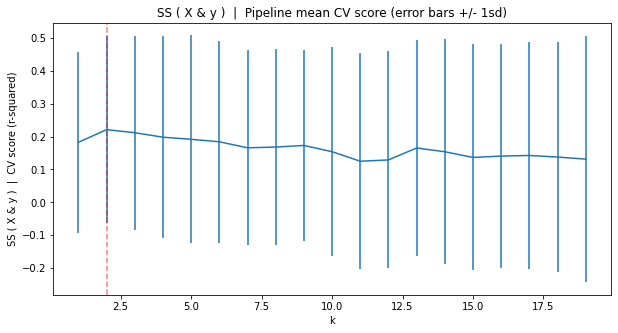

In [51]:
best_k_SS = lr_grid_cv_SS.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k_SS, score_mean_SS, yerr=score_std_SS)
plt.axvline(x=best_k_SS, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('SS ( X & y )  |  CV score (r-squared)')
plt.title('SS ( X & y )  |  Pipeline mean CV score (error bars +/- 1sd)');

**4.1.1.1 Fit & assess performance using cross-validation**

In [52]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [53]:
rf_default_cv_results = cross_validate(RF_pipe, X_train_SS, y_train_SS, cv=5)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

In [54]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([ 0.48854403,  0.29888839,  0.36485315,  0.20871414, -0.20828454])

In [55]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.23054303239842983, 0.237621948208338)

**4.1.1.2 Hyperparameter search using GridSearchCV**

In [56]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [57]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [58]:
rf_grid_cv.fit(X_train_SS, y_train_SS)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [59]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 233,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

In [60]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train_SS, y_train_SS, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

array([ 0.47691526,  0.2930633 ,  0.36804236,  0.26142254, -0.17465156])

In [61]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.24495838033953787, 0.222535983002939)

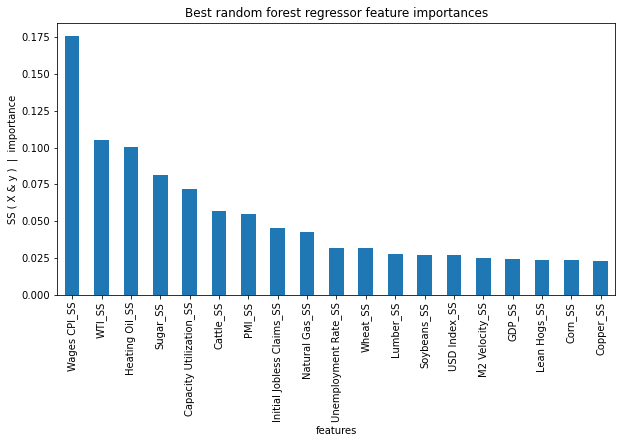

In [62]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train_SS.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('SS ( X & y )  |  importance')
plt.title('Best random forest regressor feature importances');

**4.1.2 X only ( `_SS_y_uns` )**

In [63]:
pipe_SS_y_uns = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

In [64]:
k_SS_y_uns = [k_SS_y_uns+1 for k_SS_y_uns in range(len(X_train_SS_y_uns.columns))]
grid_params_SS_y_uns = {'selectkbest__k': k_SS_y_uns}

In [65]:
lr_grid_cv_SS_y_uns = GridSearchCV(pipe_SS_y_uns, param_grid=grid_params_SS_y_uns, cv=5, n_jobs=-1)

In [66]:
lr_grid_cv_SS_y_uns.fit(X_train_SS_y_uns, y_train_SS_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000002787D8EE310>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19]})

In [67]:
score_mean_SS_y_uns = lr_grid_cv_SS_y_uns.cv_results_['mean_test_score']
score_std_SS_y_uns = lr_grid_cv_SS_y_uns.cv_results_['std_test_score']
cv_k_SS_y_uns = [k_SS_y_uns for k_SS_y_uns in lr_grid_cv_SS_y_uns.cv_results_['param_selectkbest__k']]

In [68]:
lr_grid_cv_SS_y_uns.best_params_

{'selectkbest__k': 2}

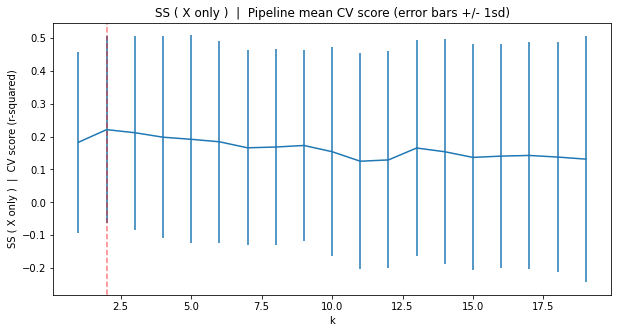

In [69]:
best_k_SS_y_uns = lr_grid_cv_SS_y_uns.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k_SS_y_uns, score_mean_SS_y_uns, yerr=score_std_SS_y_uns)
plt.axvline(x=best_k_SS_y_uns, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('SS ( X only )  |  CV score (r-squared)')
plt.title('SS ( X only )  |  Pipeline mean CV score (error bars +/- 1sd)');

In [70]:
RF_pipe_y_uns = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

**4.1.2.1 Fit & assess performance using cross-validation**

In [71]:
rf_default_cv_results_y_uns = cross_validate(RF_pipe_y_uns, X_train_SS_y_uns, y_train_SS_y_uns, cv=5)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

In [72]:
rf_cv_scores_y_uns = rf_default_cv_results_y_uns['test_score']
rf_cv_scores_y_uns

array([ 0.47401884,  0.29547331,  0.35018815,  0.17950671, -0.20548066])

In [73]:
np.mean(rf_cv_scores_y_uns), np.std(rf_cv_scores_y_uns)

(0.21874127062410578, 0.23230855696864927)

**4.1.2.2  Hyperparameter search using GridSearchCV**

In [74]:
n_est_y_uns = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params_y_uns = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params_y_uns

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [75]:
rf_grid_cv_y_uns = GridSearchCV(RF_pipe_y_uns, param_grid=grid_params_y_uns, cv=5, n_jobs=-1)

In [76]:
rf_grid_cv_y_uns.fit(X_train_SS_y_uns, y_train_SS_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [77]:
rf_grid_cv_y_uns.best_params_

{'randomforestregressor__n_estimators': 297,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

In [78]:
rf_best_cv_results_y_uns = cross_validate(rf_grid_cv_y_uns.best_estimator_, X_train_SS_y_uns, y_train_SS_y_uns, cv=5)
rf_best_scores_y_uns = rf_best_cv_results_y_uns['test_score']
rf_best_scores_y_uns

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

array([ 0.47705886,  0.29413716,  0.37244342,  0.24021046, -0.17273298])

In [79]:
np.mean(rf_best_scores_y_uns), np.std(rf_best_scores_y_uns)

(0.2422233841355784, 0.22225788461740145)

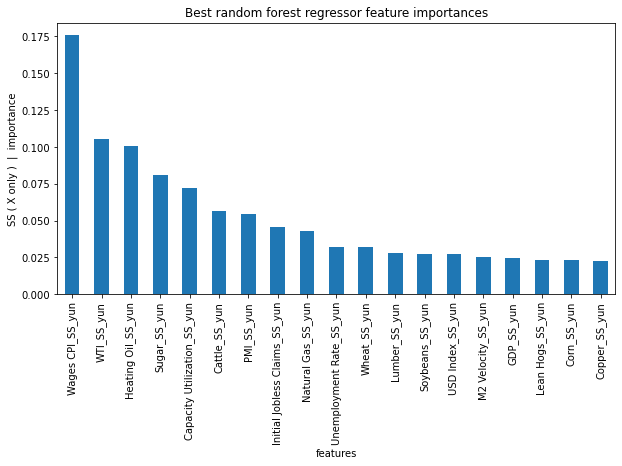

In [80]:
plt.subplots(figsize=(10, 5))
imps_y_uns = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps_y_uns = pd.Series(imps_y_uns, index=X_train_SS_y_uns.columns).sort_values(ascending=False)
rf_feat_imps_y_uns.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('SS ( X only )  |  importance')
plt.title('Best random forest regressor feature importances');

**4.1.3 X & y ( `_LG` )**

In [81]:
pipe_LG = make_pipeline(
    SimpleImputer(strategy='median'), 
    PowerTransformer(),
    SelectKBest(f_regression),
    LinearRegression() # LogisticRegression() is for predicting 0 & 1
)

In [82]:
k_LG = [k_LG+1 for k_LG in range(len(X_train_LG.columns))]
grid_params_LG = {'selectkbest__k': k_LG}

In [83]:
lr_grid_cv_LG = GridSearchCV(pipe_LG, param_grid=grid_params_LG, cv=5, n_jobs=-1)

In [84]:
lr_grid_cv_LG.fit(X_train_LG, y_train_LG)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('powertransformer', PowerTransformer()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000002787D8EE310>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19]})

In [85]:
score_mean_LG = lr_grid_cv_LG.cv_results_['mean_test_score']
score_std_LG = lr_grid_cv_LG.cv_results_['std_test_score']
cv_k_LG = [k_LG for k_LG in lr_grid_cv_LG.cv_results_['param_selectkbest__k']]

In [86]:
lr_grid_cv_LG.best_params_

{'selectkbest__k': 2}

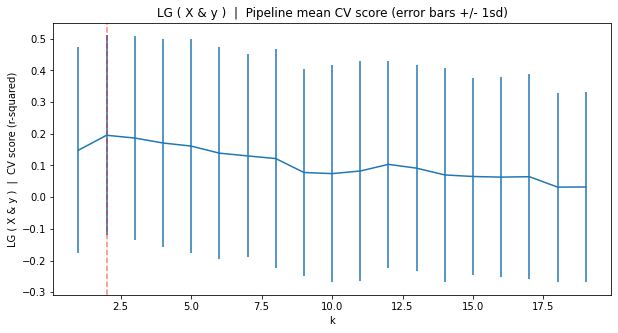

In [87]:
best_k_LG = lr_grid_cv_LG.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k_LG, score_mean_LG, yerr=score_std_LG)
plt.axvline(x=best_k_LG, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('LG ( X & y )  |  CV score (r-squared)')
plt.title('LG ( X & y )  |  Pipeline mean CV score (error bars +/- 1sd)');

In [88]:
RF_pipe_LG = make_pipeline(
    SimpleImputer(strategy='median'),
    PowerTransformer(),
    RandomForestRegressor(random_state=47)
)

**4.1.3.1  Fit & assess performance using cross-validation**

In [89]:
rf_default_cv_results_LG = cross_validate(RF_pipe_LG, X_train_LG, y_train_LG, cv=5)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

In [90]:
rf_cv_scores_LG = rf_default_cv_results_LG['test_score']
rf_cv_scores_LG

array([ 0.48470773,  0.30720991,  0.34482142,  0.18603711, -0.15241307])

In [91]:
np.mean(rf_cv_scores_LG), np.std(rf_cv_scores_LG)

(0.23407261893650885, 0.21545807708300357)

**4.1.3.2 Hyperparameter search using GridSearchCV**

In [92]:
n_est_LG = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params_LG = {
        'randomforestregressor__n_estimators': n_est,
        'powertransformer': [PowerTransformer(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params_LG

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'powertransformer': [PowerTransformer(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [93]:
rf_grid_cv_LG = GridSearchCV(RF_pipe_LG, param_grid=grid_params_LG, cv=5, n_jobs=-1)

In [94]:
rf_grid_cv_LG.fit(X_train_LG, y_train_LG)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('powertransformer', PowerTransformer()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'powertransformer': [PowerTransformer(), None],
                         'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                

In [95]:
rf_grid_cv_LG.best_params_

{'powertransformer': None,
 'randomforestregressor__n_estimators': 297,
 'simpleimputer__strategy': 'mean'}

In [96]:
rf_best_cv_results_LG = cross_validate(rf_grid_cv_LG.best_estimator_, X_train_LG, y_train_LG, cv=5)
rf_best_scores_LG = rf_best_cv_results_LG['test_score']
rf_best_scores_LG

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

array([ 0.48565687,  0.31156905,  0.36999933,  0.23177919, -0.12490394])

In [97]:
np.mean(rf_best_scores_LG), np.std(rf_best_scores_LG)

(0.25482010168020996, 0.2071200351754669)

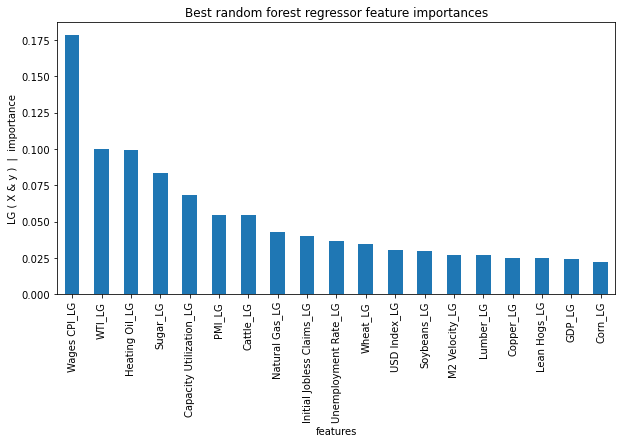

In [98]:
plt.subplots(figsize=(10, 5))
imps_LG = rf_grid_cv_LG.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps_LG = pd.Series(imps_LG, index=X_train_LG.columns).sort_values(ascending=False)
rf_feat_imps_LG.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('LG ( X & y )  |  importance')
plt.title('Best random forest regressor feature importances');

**4.1.4 X only ( `_LG_y_uns` )**

In [99]:
pipe_LG_y_uns = make_pipeline(
    SimpleImputer(strategy='median'), 
    PowerTransformer(),
    SelectKBest(f_regression),
    LinearRegression() # should this be LogisticRegression()
)

In [100]:
k_LG_y_uns = [k_LG_y_uns+1 for k_LG_y_uns in range(len(X_train_LG_y_uns.columns))]
grid_params_LG_y_uns = {'selectkbest__k': k_LG_y_uns}

In [101]:
lr_grid_cv_LG_y_uns = GridSearchCV(pipe_LG_y_uns, param_grid=grid_params_LG_y_uns, cv=5, n_jobs=-1)

In [102]:
lr_grid_cv_LG_y_uns.fit(X_train_LG_y_uns, y_train_LG_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('powertransformer', PowerTransformer()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000002787D8EE310>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19]})

In [103]:
score_mean_LG_y_uns = lr_grid_cv_LG_y_uns.cv_results_['mean_test_score']
score_std_LG_y_uns = lr_grid_cv_LG_y_uns.cv_results_['std_test_score']
cv_k_LG_y_uns = [k_LG_y_uns for k_LG_y_uns in lr_grid_cv_LG_y_uns.cv_results_['param_selectkbest__k']]

In [104]:
lr_grid_cv_LG_y_uns.best_params_

{'selectkbest__k': 2}

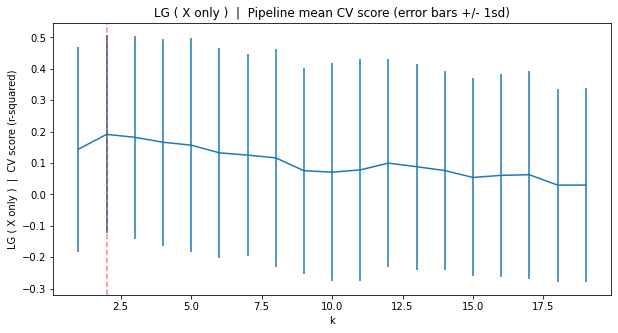

In [105]:
best_k_LG_y_uns = lr_grid_cv_LG_y_uns.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k_LG_y_uns, score_mean_LG_y_uns, yerr=score_std_LG_y_uns)
plt.axvline(x=best_k_LG_y_uns, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('LG ( X only )  |  CV score (r-squared)')
plt.title('LG ( X only )  |  Pipeline mean CV score (error bars +/- 1sd)');

In [106]:
RF_pipe_LG_y_uns = make_pipeline(
    SimpleImputer(strategy='median'),
    PowerTransformer(),
    RandomForestRegressor(random_state=47)
)

**4.1.4.1 Fit & assess performance using cross-validation**

In [107]:
rf_default_cv_results_LG_y_uns = cross_validate(RF_pipe_LG_y_uns, X_train_LG_y_uns, y_train_LG_y_uns, cv=5)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

In [108]:
rf_cv_scores_LG_y_uns = rf_default_cv_results_LG_y_uns['test_score']
rf_cv_scores_LG_y_uns

array([ 0.48155345,  0.29606332,  0.35453597,  0.17625677, -0.20471937])

In [109]:
np.mean(rf_cv_scores_LG_y_uns), np.std(rf_cv_scores_LG_y_uns)

(0.22073802859193217, 0.23434720081397034)

**4.1.4.2 Hyperparameter search using GridSearchCV**

In [110]:
n_est_LG_y_uns = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params_LG_y_uns = {
        'randomforestregressor__n_estimators': n_est,
        'powertransformer': [PowerTransformer(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params_LG_y_uns

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'powertransformer': [PowerTransformer(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [111]:
rf_grid_cv_LG_y_uns = GridSearchCV(RF_pipe_LG_y_uns, param_grid=grid_params_LG_y_uns, cv=5, n_jobs=-1)

In [112]:
rf_grid_cv_LG_y_uns.fit(X_train_LG_y_uns, y_train_LG_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('powertransformer', PowerTransformer()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'powertransformer': [PowerTransformer(), None],
                         'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                

In [113]:
rf_grid_cv_LG_y_uns.best_params_

{'powertransformer': None,
 'randomforestregressor__n_estimators': 297,
 'simpleimputer__strategy': 'mean'}

In [114]:
rf_best_cv_results_LG_y_uns = cross_validate(rf_grid_cv_LG_y_uns.best_estimator_, X_train_LG_y_uns, y_train_LG_y_uns, cv=5)
rf_best_scores_LG_y_uns = rf_best_cv_results_LG_y_uns['test_score']
rf_best_scores_LG_y_uns

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

array([ 0.48413362,  0.29577962,  0.37478196,  0.23888659, -0.17556269])

In [115]:
np.mean(rf_best_scores_LG_y_uns), np.std(rf_best_scores_LG_y_uns)

(0.2436038193611521, 0.22516989704125062)

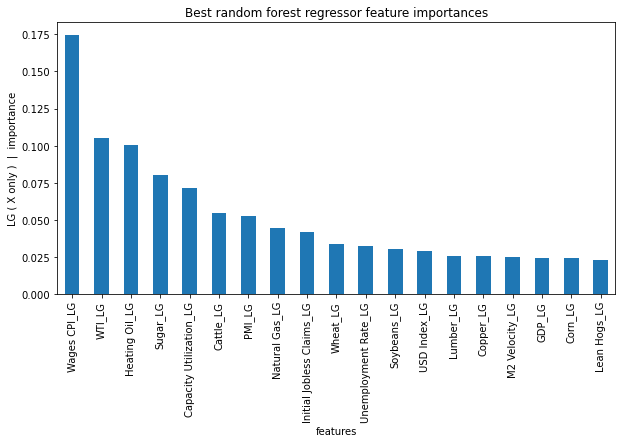

In [116]:
plt.subplots(figsize=(10, 5))
imps_LG_y_uns = rf_grid_cv_LG_y_uns.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps_LG_y_uns = pd.Series(imps_LG_y_uns, index=X_train_LG_y_uns.columns).sort_values(ascending=False)
rf_feat_imps_LG_y_uns.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('LG ( X only )  |  importance')
plt.title('Best random forest regressor feature importances');

**4.1.5 Combination of `SS` & `LG` for X only ( `_SS_LG` )**

In [117]:
# Keeping these here for easier referance; they apply to the Standard Scaler for X only
# X_tr_SS_LG
# y_tr_y_uns
# X_te_SS_LG
# y_te_y_uns


In [118]:
pipe__SS_LG = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression() # should this be LogisticRegression()
)

In [119]:
k_SS_LG = [k_SS_LG+1 for k_SS_LG in range(len(X_tr_SS_LG.columns))]
grid_params_SS_LG = {'selectkbest__k': k_SS_LG}

In [120]:
lr_grid_cv_SS_LG = GridSearchCV(pipe__SS_LG, param_grid=grid_params_SS_LG, cv=5, n_jobs=-1)

In [121]:
lr_grid_cv_SS_LG.fit(X_tr_SS_LG, y_tr_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000002787D8EE310>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19]})

In [125]:
score_mean_SS_LG = lr_grid_cv_SS_LG.cv_results_['mean_test_score']
score_std_SS_LG = lr_grid_cv_SS_LG.cv_results_['std_test_score']
cv_k_SS_LG = [k_SS_LG for k_SS_LG in lr_grid_cv_SS_LG.cv_results_['param_selectkbest__k']]

In [126]:
lr_grid_cv_SS_LG.best_params_

{'selectkbest__k': 2}

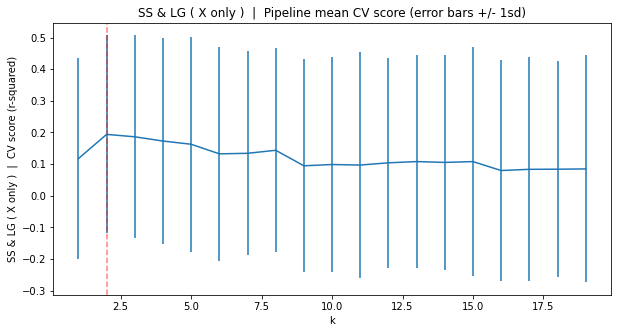

In [127]:
best_k_SS_LG = lr_grid_cv_SS_LG.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k_SS_LG, score_mean_SS_LG, yerr=score_std_SS_LG)
plt.axvline(x=best_k_SS_LG, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('SS & LG ( X only )  |  CV score (r-squared)')
plt.title('SS & LG ( X only )  |  Pipeline mean CV score (error bars +/- 1sd)');

In [129]:
RF_pipe_SS_LG = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

**4.1.5.1 Fit & assess performance using cross-validation**

In [130]:
rf_default_cv_results_SS_LG = cross_validate(RF_pipe_SS_LG, X_tr_SS_LG, y_tr_y_uns, cv=5)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

In [131]:
rf_cv_scores_SS_LG = rf_default_cv_results_SS_LG['test_score']
rf_cv_scores_SS_LG

array([ 0.4744572 ,  0.28358045,  0.38191614,  0.19797154, -0.1662812 ])

In [132]:
np.mean(rf_cv_scores_SS_LG), np.std(rf_cv_scores_SS_LG)

(0.23432882516603387, 0.22076214409995865)

**4.1.5.2 Hyperparameter search using GridSearchCV**

In [133]:
n_est_SS_LG = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params_SS_LG = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params_SS_LG

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [134]:
rf_grid_cv_SS_LG = GridSearchCV(RF_pipe_SS_LG, param_grid=grid_params_SS_LG, cv=5, n_jobs=-1)

In [135]:
rf_grid_cv_SS_LG.fit(X_tr_SS_LG, y_tr_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [136]:
rf_grid_cv_SS_LG.best_params_

{'randomforestregressor__n_estimators': 233,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

In [137]:
rf_best_cv_results_SS_LG = cross_validate(rf_grid_cv_SS_LG.best_estimator_, X_tr_SS_LG, y_tr_y_uns, cv=5)
rf_best_scores_SS_LG = rf_best_cv_results_SS_LG['test_score']
rf_best_scores_SS_LG

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

array([ 0.47451799,  0.29312246,  0.37666858,  0.25133331, -0.15417633])

In [138]:
np.mean(rf_best_scores_SS_LG), np.std(rf_best_scores_SS_LG)

(0.24829320383105052, 0.21524800680553763)

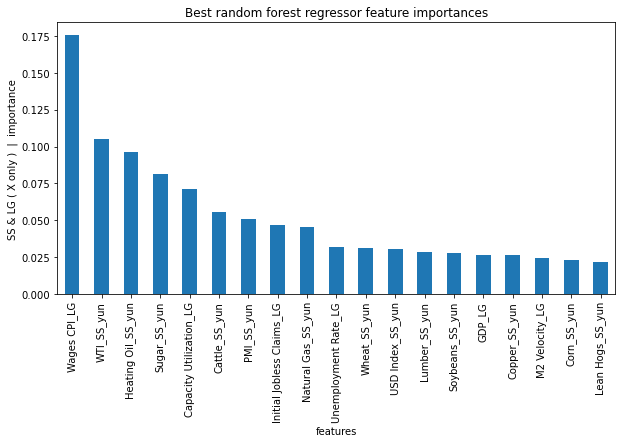

In [139]:
plt.subplots(figsize=(10, 5))
imps_SS_LG = rf_grid_cv_SS_LG.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps_SS_LG = pd.Series(imps_SS_LG, index=X_tr_SS_LG.columns).sort_values(ascending=False)
rf_feat_imps_SS_LG.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('SS & LG ( X only )  |  importance')
plt.title('Best random forest regressor feature importances');

# 4.2 Conclusion

All models point to `Wages CPI` & `WTI` as the two ( 2 ) best variables to include & the performance diminishes thereafter.

I believe we should include these only.